<a href="https://colab.research.google.com/github/OlaKozak/CF/blob/master/CF_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/CF_C"

/content/drive/My Drive/Colab Notebooks/CF_C


**Part #2 - Revenue per device analysis (Excel)**

In [3]:
#Importing data
df_task1 = pd.read_csv('task1.csv', parse_dates=['device_install_date'])
df_task1['month'] = pd.DatetimeIndex(df_task1['device_install_date']).month
df_task1.head()

,device_id,device_install_date,country,total_revenue,month
0,FD80F264-5F61-4244-A9C7-5657E38A45A8,2019-08-11,US,3.14,8
1,160B8148-4541-4FEE-97BB-A333EEF3EDAE,2019-08-11,US,10.05,8
2,B470E082-29D9-4FED-BC7A-83906425855C,2019-08-11,US,11.95,8
3,559E65BB-AB4A-4CB2-AB54-60B8C47FCFD8,2019-08-11,US,0.00,8
4,307C26F6-F4BD-4A5B-AF9F-5678EAA29494,2019-08-11,AU,0.00,8


In [4]:
#10 highest values come from US
df_task1.sort_values('total_revenue', ascending=False).head(10)

,device_id,device_install_date,country,total_revenue,month
27870,E5B3407C-E440-414F-A63C-C9BDDD415EAD,2019-12-12,US,453.75,12
11440,721EFF7C-85FA-493E-98C2-241D3703CACF,2019-10-13,US,178.79,10
8247,2EA532C9-F8D1-43D2-A8BD-73E939C17596,2019-09-27,US,148.10,9
27925,C0965EFD-096D-4E59-8407-7F9420158B64,2019-12-12,US,124.62,12
35010,EC4B3080-08B9-4F58-A47B-D5BE94081A93,2020-01-07,US,120.00,1
34496,2578199E-8BAE-445C-9E03-D6286A11D111,2020-01-05,US,117.72,1
7807,CECD6914-07D6-4751-AAF8-03AC5BD6490B,2019-09-24,US,106.24,9
22210,A56E4414-E371-4AF5-AE31-812DCD376F30,2019-11-29,US,96.31,11
27714,949BC1C1-5ED0-45DE-8195-C8D2949475AF,2019-12-12,US,90.66,12
19630,F8AD4945-4D55-4147-973B-27104E4E0008,2019-11-22,US,88.98,11


In [5]:
#Calculating Mode for all devices
print (st.mode(df_task1.total_revenue))

0.0


In [6]:
#Mean and std (additionaly min, max and percentiles) for all devices
df_task1.describe()

,total_revenue,month
count,42089.000000,42089.000000
mean,0.344027,8.538122
std,3.664971,3.990929
min,0.000000,1.000000
25%,0.000000,8.000000
50%,0.000000,10.000000
75%,0.000000,11.000000
max,453.750000,12.000000


In [7]:
#94% of all devices didn't bring any revenue
df_task1.total_revenue.value_counts(normalize=True)[0]

0.9407921309605836

Presenting on histogram how right skewed is distibution - majority of deivices (94%) didn't generate any revenue (mode is 0), 
mean is very low (0.344) and influenced a few high values up to 453.75 (but I wouldn't call them outliers)  

(array([4.2059e+04, 2.2000e+01, 5.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.   ,  45.375,  90.75 , 136.125, 181.5  , 226.875, 272.25 ,
        317.625, 363.   , 408.375, 453.75 ]),
 <a list of 10 Patch objects>)

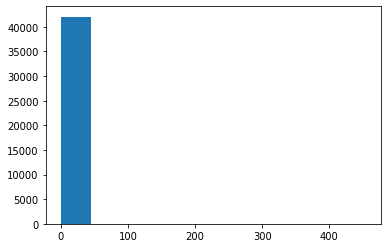

In [8]:
plt.hist(df_task1.total_revenue)

When we take just 5 countries we cover more than 80%
 devices.



In [9]:
df_task1.country.value_counts(normalize=True)

US    0.624929
GB    0.082541
CA    0.066218
AU    0.033881
RU    0.024449
        ...   
MR    0.000024
AI    0.000024
MN    0.000024
EU    0.000024
SC    0.000024
Name: country, Length: 161, dtype: float64

In [0]:
df_task1_f = df_task1[df_task1["country"].isin(["US", "GB", "CA", "AU", "RU"])]

In [11]:
for country in df_task1_f.country.unique():
  print ("Mode of " + str(country) + " is " + str(st.mode(df_task1_f[df_task1.country==country].total_revenue)))

Mode of US is 0.0
Mode of AU is 0.0
Mode of RU is 0.0
Mode of GB is 0.0
Mode of CA is 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


We neet to be carreful when looking at stats - mode for PW (Palau?) was 52.55. Impressive?
Not really when you check that there was just one device (but with quite high revenue)
It's one of the reasons I decided to work on filtered list of countries.

In [12]:
df_task1[df_task1.country=='PW'].head()

,device_id,device_install_date,country,total_revenue,month
7383,A1C48062-29C2-4A16-8B08-C38220DEF283,2019-09-22,PW,52.55,9


First and most obvious  - in this dataset devices mostly come from US. Those devices also bring highest revenue (looking at average) but has the highest standard deviaton - it simply shows largest revenue range (you can see that also when looking at maximum values for countries). When we look at mode for those 5 countries it's 0 as the most common value is 0.

In [13]:
print (df_task1_f.groupby('country').describe().unstack(1))

                      country
total_revenue  count  AU          1426.0
                      CA          2787.0
                      GB          3474.0
                      RU          1029.0
                      US         26302.0
                                  ...   
month          max    AU            12.0
                      CA            12.0
                      GB            12.0
                      RU            12.0
                      US            12.0
Length: 80, dtype: float64


**What do we get from this simply descriptive statistics?** 

We know our main markets and how revenue is distributed.<br>

**What could we do else?**
Do timeseries analysis - check if there are trends in time/ seasonality. <br>
If we have number of transactions in time we could check what brings income - many small purchases or less but bigger? <br>
If have dates of transaction if people install just before purchase or install and do shopping later? <br>
What is churn rate? How quickly people de-install? I'm just wondering if there is a group of people who install before bigger purchase and de-install immediately after. If so, how to keep them? <br>
Check how much we had to invest on the market to achive that revenue. <br>


**Part #3 - Revenue calculation exercise (Excel)<br>**
A) our average year 1 revenue per user for , all countries<br>
B) our average year 1 revenue per user for , top 3 countries <br>
C) our average revenue per user over time, indicating whether this has changed over time, all countries <br>
D) our average revenue per user over time, indicating whether this has changed over time, top 3 countries


In [14]:
df_task2 = pd.read_csv('task2.csv', parse_dates=['installedon', 'ordersfrom'])
df_task2.head()

,installedon,installcount,uninstallcount,ordersfrom,totalusersconverted,ordersfromweek,avgperinst,thisweekusersconverted,usrperc,totalrevenue
0,2019-02-22,245,72,2019-02-18,32,1,0.0809,9,0.036735,234.05
1,2019-02-22,245,72,2019-02-25,32,2,0.0199,3,0.012245,234.05
2,2019-02-22,245,72,2019-03-04,32,3,0.0514,4,0.016327,234.05
3,2019-02-22,245,72,2019-03-11,32,4,0.0080,3,0.012245,234.05
4,2019-02-22,245,72,2019-03-18,32,5,0.0284,2,0.008163,234.05


ARPU <br>
total revenue/ total number of users

In [15]:
df_task2.totalrevenue.sum()/ df_task2.installcount.sum()

0.8907603537575011

In [16]:
df_task2.totalrevenue.sum()

1576568.33

In [18]:
drive.mount("/content/drive")

NameError: ignored

In [17]:
!git add CF/CF_C.ipynb

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).
